Irfan Wasway

We will be using the deterministic SIR model to analyse the effects of social distancing. We know this model is given by the system of ODE's:
$$
\frac{{\rm d} S}{{\rm d} t}  = - \beta S I, \quad 
\frac{{\rm d} I}{{\rm d} t}  = \beta S I - \mu I, \quad 
\frac{{\rm d} R}{{\rm d} t}  = \mu I.
$$

The time-dependent infection rate parameter $\beta$ is as such:
$$
\beta(t)  = 2 \times 10^{-7} \text{  whenever  } t < T, \\
\beta(t)  = 1.5 \times 10^{-7} \text{  whenever  } T \le t \le T + 30, \\
\beta(t)  = 2 \times 10^{-7} \text{  whenever  } t > T + 30. \\
$$

Firstly, we will begin by running the model when $T=30$ sYA. We will be using $\mu=0.1, N=10^6$ and assume our initial values are $S=N-5,I=5,R=0$.

In [3]:
# Importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [4]:
# Defining the value of T
T = 30

# Defining the RHS of the ODE system
def SIR(y, t):
    S, I, R = y

    # Defines the time-dependent infection rate parameter depending on the values of t and T
    if T <= t <= T + 30:
        beta = 1.5 * 10**-7
    else:
        beta = 2 * 10**-7

    # Defines the removal rate parameter, mu
    mu = 0.1

    N = S + I + R
    Sdot = -beta * S * I
    Idot = beta * S * I - mu * I
    Rdot = mu * I
    
    return Sdot, Idot, Rdot

In [5]:
# Now we set up the problem

# Setting up the time grid for the solution
tf = 200
Nsteps = 1000
t = np.linspace(0, tf, Nsteps+1)

# Setting the initial conditions and putting them into an array, y0
S0 = 10**6 - 5
I0 = 5
R0 = 0
y0 = np.array([S0, I0, R0])

In [6]:
# Next, we call the ODE solver and extract the solutions

y_sol = odeint(SIR, y0, t)

# Extracting S, I, R from the solution array, y_sol
S = y_sol[:,0]
I = y_sol[:,1]
R = y_sol[:,2]

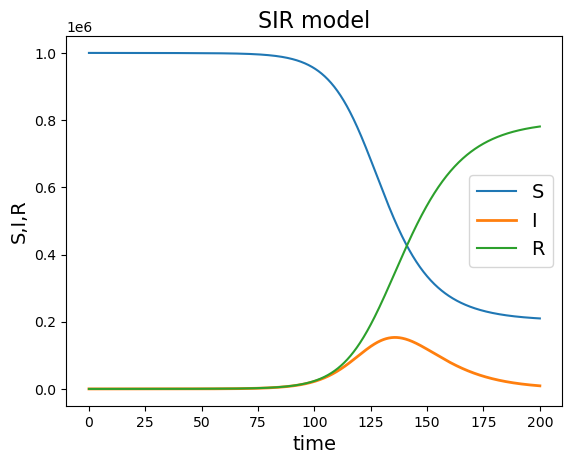

In [11]:
# Finally, we plot the time-series to show S(t), I(t), and R(t) with this value of T

plt.plot(t, S, label = "S")
plt.plot(t, I, lw = 2, label = "I")
plt.plot(t, R, label = "R")

# Labelling the axes
plt.xlabel("time", fontsize = 14)
plt.ylabel("S,I,R", fontsize = 14)

# Adding the title to the plot
plt.title("SIR model", fontsize = 16)

# Including the legend in the plot
plt.legend(fontsize = 14)
plt.show()   

Now let's consider a scenario where $T$ may not necessarily be 30 days, and may be any fixed integer value between 1 and 200 days.

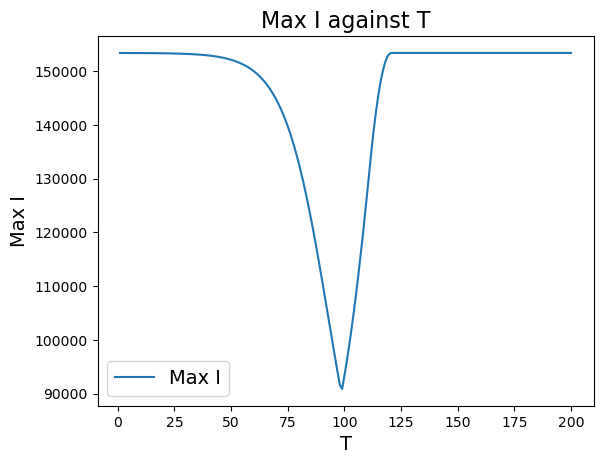

In [24]:
# Creating an array, Imax, to store the maximum value of I for each T
Imax = []

# Creating a for loop to cycle through values of T between 1 and 200
for T in range(1,201):
    # Calling the ODE solver and extracting the solutions
    y_sol = odeint(SIR, y0, t)
    
    # Extracting I from the solution array, y_sol
    # We only extract I as this is all we're analysing here
    I = y_sol[:,1]

    # Adding the maximum value of I to the array Imax
    Imax.append(np.max(I))

# Setting up the plot
T_points = list(range(1,201))

# Plotting the maximum value of I as a function of T
plt.plot(T_points, Imax, label="Max I")

# Labelling the axes
plt.xlabel("T", fontsize = 14)
plt.ylabel("Max I", fontsize = 14)

# Adding the title to the plot
plt.title("Max I against T", fontsize = 16)

# Including the legend in the plot
plt.legend(fontsize = 14)
plt.show()   

In [32]:
# Now we find the value of T that minimses the maximum value of T
Tmin = 0
for i in range(1,200):
    Imax_T = Imax[i]
    if Imax_T < Imax[Tmin]:
        Tmin = i

print(Tmin, "is the value of T that minimises the maximum value of I.")

98 is the value of T that minimises the maximum value of I.
